# Good Reads Data Analysis and Book Recommender

In [2]:
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install faiss-cpu
!pip3 install annoy #Spotify made library for approximate nearest neighbors 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from annoy import AnnoyIndex
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
books = pd.read_csv("/Users/priyankapatel/Documents/Code/archive/books_data.csv", on_bad_lines='skip')
books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [6]:
books_data = books.dropna(subset=["authors"])
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [44]:
print(books.columns)

Index(['Title', 'authors', 'categories', 'ratingsCount', 'profileName',
       'review/helpfulness', 'review/score', 'review/time', 'review/summary',
       'review/text'],
      dtype='object')


In [7]:
books_ratings = pd.read_csv("/Users/priyankapatel/Documents/Code/archive/Books_rating.csv", on_bad_lines='skip')
books_ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [43]:
# Right Join
books = pd.merge(books_data, books_ratings, how="right", on="Title")
books = books.drop(columns=["image", "publisher", "publishedDate", "infoLink", "Price", "User_id", "previewLink", "Id", "description"])
books.head()

,Title,authors,categories,ratingsCount,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,['Julie Strain'],['Comics & Graphic Novels'],NaN,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],NaN,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],NaN,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],NaN,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],NaN,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


# Top Genres by Ratings

In [9]:
# Genre and the average rating

aggregations = {
    'review/score': 'mean',  # Calculate mean of 'Ratings' column
    'ratingsCount': 'sum'      # Calculate sum of 'Sales' column
}
avg_ratings = books.groupby('categories').agg(aggregations)

#avg_ratings = books.groupby('categories').sum()
avg_ratings = avg_ratings[avg_ratings['ratingsCount'] != 0.0]
avg_ratings = avg_ratings[~avg_ratings.index.str.contains(r'\d')]
avg_ratings =avg_ratings.sort_values(by='ratingsCount', ascending=False)
top_ratings = avg_ratings.head()
top_ratings


,review/score,ratingsCount
categories,,
['Fiction'],4.113615,203065104.0
['Juvenile Fiction'],4.453461,86962557.0
['Business & Economics'],4.122382,26911936.0
['Philosophy'],4.181219,16068804.0
['Biography & Autobiography'],4.254965,12258596.0


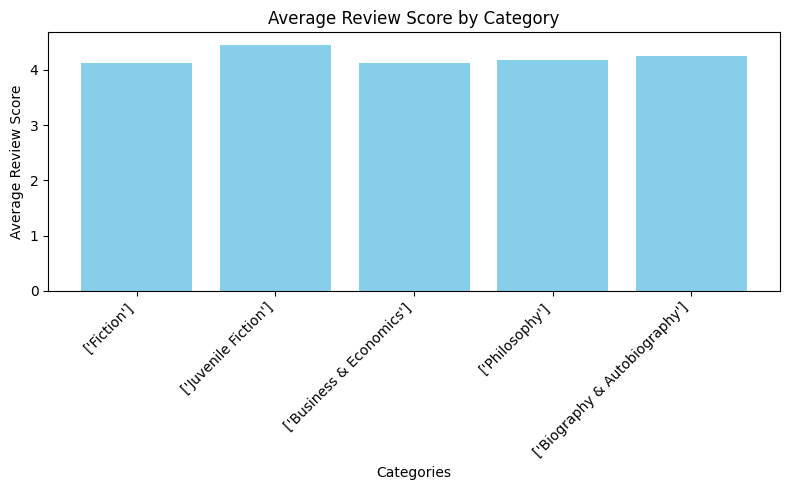

In [10]:
# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(top_ratings.index, top_ratings['review/score'], color='skyblue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
books['review/summary'] = books['review/summary'].fillna('')

# Subset the data to work with a smaller dataset
books_subset = books.sample(1000, random_state=42)  # Sample 1000 books

# Fill NaN values in the 'review/summary' column with empty strings
books_subset['review/summary'] = books_subset['review/summary'].fillna('')
books_subset.head()

,Title,authors,categories,ratingsCount,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2945667,"A dictionary of the Targumim, the Talmud Babli...",['Marcus Jastrow'],['Reference'],NaN,Ariel,2/6,4.0,1122163200,Jastrow,Jastrow made a great workthis dictionary can h...
2352586,Espresso Coffee: Professional Techniques,['David C. Schomer'],['Coffee'],NaN,David barnes,0/1,2.0,1356912000,NOT the book,Extremely disappointed by the SHORT length and...
1531260,The First King of Shannara (The Sword of Shann...,['Terry Brooks'],['Fiction'],91.0,M Carlton,4/4,5.0,1105574400,Great (what do you expect?),"This, like all of Brook's Shannara series book..."
941910,Wuthering Heights (Riverside editions),['Emily Brontë'],NaN,NaN,LadyJ,0/0,4.0,1353888000,Satisfied,I enjoyed this classic. I didn't know the stor...
2582125,"A Cat, a Man, and Two Women (Japans Modern Wri...","['Junichiro Tanizaki', 'Paul McCarthy']",['Fiction'],1.0,"David C. Arnold ""master D""",1/2,5.0,1167955200,"Ordered 09/02/2006, still on backorder",I would love to read this book. Have accepted ...


# Book Recommender

In [47]:
# Get a subset of books to improve efficiency and reduce computations
books_subset = books.sample(1000, random_state=42).reset_index(drop=True)  # Sample 1000 books

# Fill NaN values in the 'review/summary' column with empty strings
books_subset['review/summary'] = books_subset['review/summary'].fillna('')

# Convert the 'categories' column to a consistent string format
books_subset['categories'] = books_subset['categories'].apply(lambda x: x[0] if isinstance(x, list) else x)
books_subset['categories'] = books_subset['categories'].str.strip().str.lower()


In [36]:

# Feature Engineering
# Use TF-IDF to extract features from 'review/summary' with a limited number of features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, max_df=0.8, min_df=5)
tfidf_matrix = tfidf_vectorizer.fit_transform(books_subset['review/summary'])

# Convert the sparse matrix to a dense matrix
tfidf_matrix_dense = tfidf_matrix.toarray()

# Use Annoy to build the index
vector_length = tfidf_matrix_dense.shape[1]
annoy_index = AnnoyIndex(vector_length, 'angular')

# Add items to the index
for i in range(len(tfidf_matrix_dense)):
    annoy_index.add_item(i, tfidf_matrix_dense[i])

# Build the index with 10 trees
annoy_index.build(10)



True

In [40]:
# Function to recommend similar books
def get_recommendations(book_title, category, k=5):
    # Check if the book title exists in the dataset
    if book_title.lower() not in books_subset['Title'].str.lower().values:
        return f"Book titled '{book_title}' not found in the dataset."
    
    # Get the index of the book
    book_index = books_subset[books_subset['Title'].str.lower() == book_title.lower()].index[0]
    
    # Check if the category exists in the dataset
    if category.lower() not in books_subset['categories'].values:
        return f"Category '{category}' not found in the dataset."

    # Filter books in the same category and reset index
    category_books = books_subset[books_subset['categories'] == category.lower()].reset_index(drop=True)
    category_indices = set(category_books.index)
    
    # Find the k nearest neighbors
    similar_books_indices = annoy_index.get_nns_by_item(book_index, k+1)  # k+1 because the first result is the book itself
    
    # Exclude the book itself
    similar_books_indices = [i for i in similar_books_indices if i != book_index]
    
    # Filter to only include books in the same category
    similar_books_indices = [i for i in similar_books_indices if i in category_indices]
    
    # Return recommended books
    recommended_books = [category_books.iloc[i]['Title'] for i in similar_books_indices[:k]]
    return recommended_books


### Modify the book title and category to test the recommender

In [48]:
book_title = 'shadow castle'
category = "['Juvenile Fiction']"

recommendations = get_recommendations(book_title, category)
print("Book recommendations: ", recommendations)

Book recommendations:  ['The Hobbit', 'Jack and Jill and Big Dog Bill (Step Into Reading Early Phonics)', 'Harry Potter and the Chamber of Secrets']
